In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("odata.csv")

df.head()

geotype  AGEfinal  Sex  Race  hhinc2  aindex_cat  dwell_typ1  medaid1  \
0        3        17    2     1       2           2           1        1   
1        1        15    1     1       1           1           1        2   
2        1        15    1     1       1           2           1        2   
3        1        15    2     3       2           2           1        2   
4        1        15    2     1       2           1           1        2   

   agric_animal1  Hunger_cat1  weightloss_attempt  weightgain_attempt  \
0              2            1                   2                   2   
1              2            2                   2                   2   
2              2            3                   2                   1   
3              2            1                   2                   2   
4              2            1                   2                   2   

   SBPfinal  DBPfinal  Cursmoker  Psych_dist2  butterspread  scores_sugar  \
0       132        78          2            2             3             3   
1       124        66          2            2             3             1   
2       128        90          2            2             4             3   
3       110        55          2            2             5             1   
4       116        67          2            1             3             3   

   scores_fruit  NutriKnowA_cat  DDScat1  CategoricalFatScore1  \
0             3               2        1                     1   
1             2               2        1                     2   
2             2               3        1                     1   
3             2               2        1                     2   
4             2               2        2                     1   

   physical_activity  Healthcare_access2yr  famhist_hbp  famhist_diabetes  \
0                  1                     1            2                 2   
1                  2                     1            1                 2   
2                  2                     2            1                 1   
3                  2                     2            1                 1   
4                  1                     2            1                 1   

   famhist_heartdis  redmeat_wfat  milkserv_daily  snack_freq  overweight  \
0                 2             1               5           2           1   
1                 2             1               3           1           1   
2                 2             1               3           2           0   
3                 1             2               5           1           0   
4                 2             1               4           1           1   

   AuditC3_MF1  
0            2  
1            2  
2            2  
3            2  
4            2

In [3]:
df["overweight"].value_counts()

0    525
1    146
Name: overweight, dtype: int64

In [4]:
#print the dimension of the dataset
print("The dataset contains %s rows and %s columns \n"%(df.shape[0],df.shape[1]))

# show the first 10 rows using dataframe.head() method
df.head(4)

The dataset contains 671 rows and 32 columns 



geotype  AGEfinal  Sex  Race  hhinc2  aindex_cat  dwell_typ1  medaid1  \
0        3        17    2     1       2           2           1        1   
1        1        15    1     1       1           1           1        2   
2        1        15    1     1       1           2           1        2   
3        1        15    2     3       2           2           1        2   

   agric_animal1  Hunger_cat1  weightloss_attempt  weightgain_attempt  \
0              2            1                   2                   2   
1              2            2                   2                   2   
2              2            3                   2                   1   
3              2            1                   2                   2   

   SBPfinal  DBPfinal  Cursmoker  Psych_dist2  butterspread  scores_sugar  \
0       132        78          2            2             3             3   
1       124        66          2            2             3             1   
2       128        90          2            2             4             3   
3       110        55          2            2             5             1   

   scores_fruit  NutriKnowA_cat  DDScat1  CategoricalFatScore1  \
0             3               2        1                     1   
1             2               2        1                     2   
2             2               3        1                     1   
3             2               2        1                     2   

   physical_activity  Healthcare_access2yr  famhist_hbp  famhist_diabetes  \
0                  1                     1            2                 2   
1                  2                     1            1                 2   
2                  2                     2            1                 1   
3                  2                     2            1                 1   

   famhist_heartdis  redmeat_wfat  milkserv_daily  snack_freq  overweight  \
0                 2             1               5           2           1   
1                 2             1               3           1           1   
2                 2             1               3           2           0   
3                 1             2               5           1           0   

   AuditC3_MF1  
0            2  
1            2  
2            2  
3            2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   geotype               671 non-null    int64
 1   AGEfinal              671 non-null    int64
 2   Sex                   671 non-null    int64
 3   Race                  671 non-null    int64
 4   hhinc2                671 non-null    int64
 5   aindex_cat            671 non-null    int64
 6   dwell_typ1            671 non-null    int64
 7   medaid1               671 non-null    int64
 8   agric_animal1         671 non-null    int64
 9   Hunger_cat1           671 non-null    int64
 10  weightloss_attempt    671 non-null    int64
 11  weightgain_attempt    671 non-null    int64
 12  SBPfinal              671 non-null    int64
 13  DBPfinal              671 non-null    int64
 14  Cursmoker             671 non-null    int64
 15  Psych_dist2           671 non-null    int64
 16  buttersp

In [6]:
#get the number of missing values in each column of the dataset
missing_count = df.isna().sum().sort_values(ascending=False)
print(missing_count)

geotype                 0
AGEfinal                0
overweight              0
snack_freq              0
milkserv_daily          0
redmeat_wfat            0
famhist_heartdis        0
famhist_diabetes        0
famhist_hbp             0
Healthcare_access2yr    0
physical_activity       0
CategoricalFatScore1    0
DDScat1                 0
NutriKnowA_cat          0
scores_fruit            0
scores_sugar            0
butterspread            0
Psych_dist2             0
Cursmoker               0
DBPfinal                0
SBPfinal                0
weightgain_attempt      0
weightloss_attempt      0
Hunger_cat1             0
agric_animal1           0
medaid1                 0
dwell_typ1              0
aindex_cat              0
hhinc2                  0
Race                    0
Sex                     0
AuditC3_MF1             0
dtype: int64


In [7]:
# check for duplicate records

df.duplicated().sum()

0

In [8]:
df.describe().T  #T transposes the resulting dataframe

count        mean        std   min    25%    50%    75%  \
geotype               671.0    2.156483   1.122743   1.0    1.0    2.0    3.0   
AGEfinal              671.0   16.004471   0.854301  15.0   15.0   16.0   17.0   
Sex                   671.0    1.558867   0.496893   1.0    1.0    2.0    2.0   
Race                  671.0    1.529061   0.924931   1.0    1.0    1.0    2.0   
hhinc2                671.0    2.183308   1.039843   1.0    1.0    2.0    3.0   
aindex_cat            671.0    1.591654   0.757168   1.0    1.0    1.0    2.0   
dwell_typ1            671.0    1.204173   0.403397   1.0    1.0    1.0    1.0   
medaid1               671.0    1.885246   0.318963   1.0    2.0    2.0    2.0   
agric_animal1         671.0    1.941878   0.234149   1.0    2.0    2.0    2.0   
Hunger_cat1           671.0    2.010432   0.878369   1.0    1.0    2.0    3.0   
weightloss_attempt    671.0    1.874814   0.331177   1.0    2.0    2.0    2.0   
weightgain_attempt    671.0    1.856930   0.350405   1.0    2.0    2.0    2.0   
SBPfinal              671.0  116.478390  12.108061  70.0  108.0  116.0  124.0   
DBPfinal              671.0   65.107303   8.809957  45.0   59.0   64.0   71.0   
Cursmoker             671.0    1.962742   0.189534   1.0    2.0    2.0    2.0   
Psych_dist2           671.0    1.900149   0.300025   1.0    2.0    2.0    2.0   
butterspread          671.0    2.880775   1.109297   1.0    2.0    3.0    4.0   
scores_sugar          671.0    1.888227   0.761594   1.0    1.0    2.0    2.0   
scores_fruit          671.0    1.889717   0.734887   1.0    1.0    2.0    2.0   
NutriKnowA_cat        671.0    2.041729   0.552918   1.0    2.0    2.0    2.0   
DDScat1               671.0    1.427720   0.495117   1.0    1.0    1.0    2.0   
CategoricalFatScore1  671.0    1.555887   0.497238   1.0    1.0    2.0    2.0   
physical_activity     671.0    1.745156   0.436098   1.0    1.0    2.0    2.0   
Healthcare_access2yr  671.0    1.673621   0.469237   1.0    1.0    2.0    2.0   
famhist_hbp           671.0    1.770492   0.420830   1.0    2.0    2.0    2.0   
famhist_diabetes      671.0    1.800298   0.400075   1.0    2.0    2.0    2.0   
famhist_heartdis      671.0    1.953800   0.210074   1.0    2.0    2.0    2.0   
redmeat_wfat          671.0    1.320417   0.466985   1.0    1.0    1.0    2.0   
milkserv_daily        671.0    2.785395   1.373033   1.0    1.0    3.0    4.0   
snack_freq            671.0    1.627422   0.483852   1.0    1.0    2.0    2.0   
overweight            671.0    0.217586   0.412912   0.0    0.0    0.0    0.0   
AuditC3_MF1           671.0    1.931446   0.252883   1.0    2.0    2.0    2.0   

                        max  
geotype                 4.0  
AGEfinal               17.0  
Sex                     2.0  
Race                    4.0  
hhinc2                  4.0  
aindex_cat              4.0  
dwell_typ1              2.0  
medaid1                 2.0  
agric_animal1           2.0  
Hunger_cat1             3.0  
weightloss_attempt      2.0  
weightgain_attempt      2.0  
SBPfinal              180.0  
DBPfinal              102.0  
Cursmoker               2.0  
Psych_dist2             2.0  
butterspread            5.0  
scores_sugar            3.0  
scores_fruit            3.0  
NutriKnowA_cat          3.0  
DDScat1                 2.0  
CategoricalFatScore1    2.0  
physical_activity       2.0  
Healthcare_access2yr    2.0  
famhist_hbp             2.0  
famhist_diabetes        2.0  
famhist_heartdis        2.0  
redmeat_wfat            2.0  
milkserv_daily          5.0  
snack_freq              2.0  
overweight              1.0  
AuditC3_MF1             2.0

In [9]:
#To check our target variable

ax = df["overweight"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Distribution")
ax.set_ylim(0,100)

# Remove y axis
#ax.get_yaxis().set_visible(False)

(0.0, 100.0)

In [10]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop(columns=["overweight", "DBPfinal", "SBPfinal"], axis =1).columns.to_list()):
    ax1 = fig.add_subplot(7, 5, i+1)
    sns.countplot(x=col, data=df, ax=ax1)

plt.tight_layout()

fig.savefig('univariate_plots.jpeg')
plt.show()

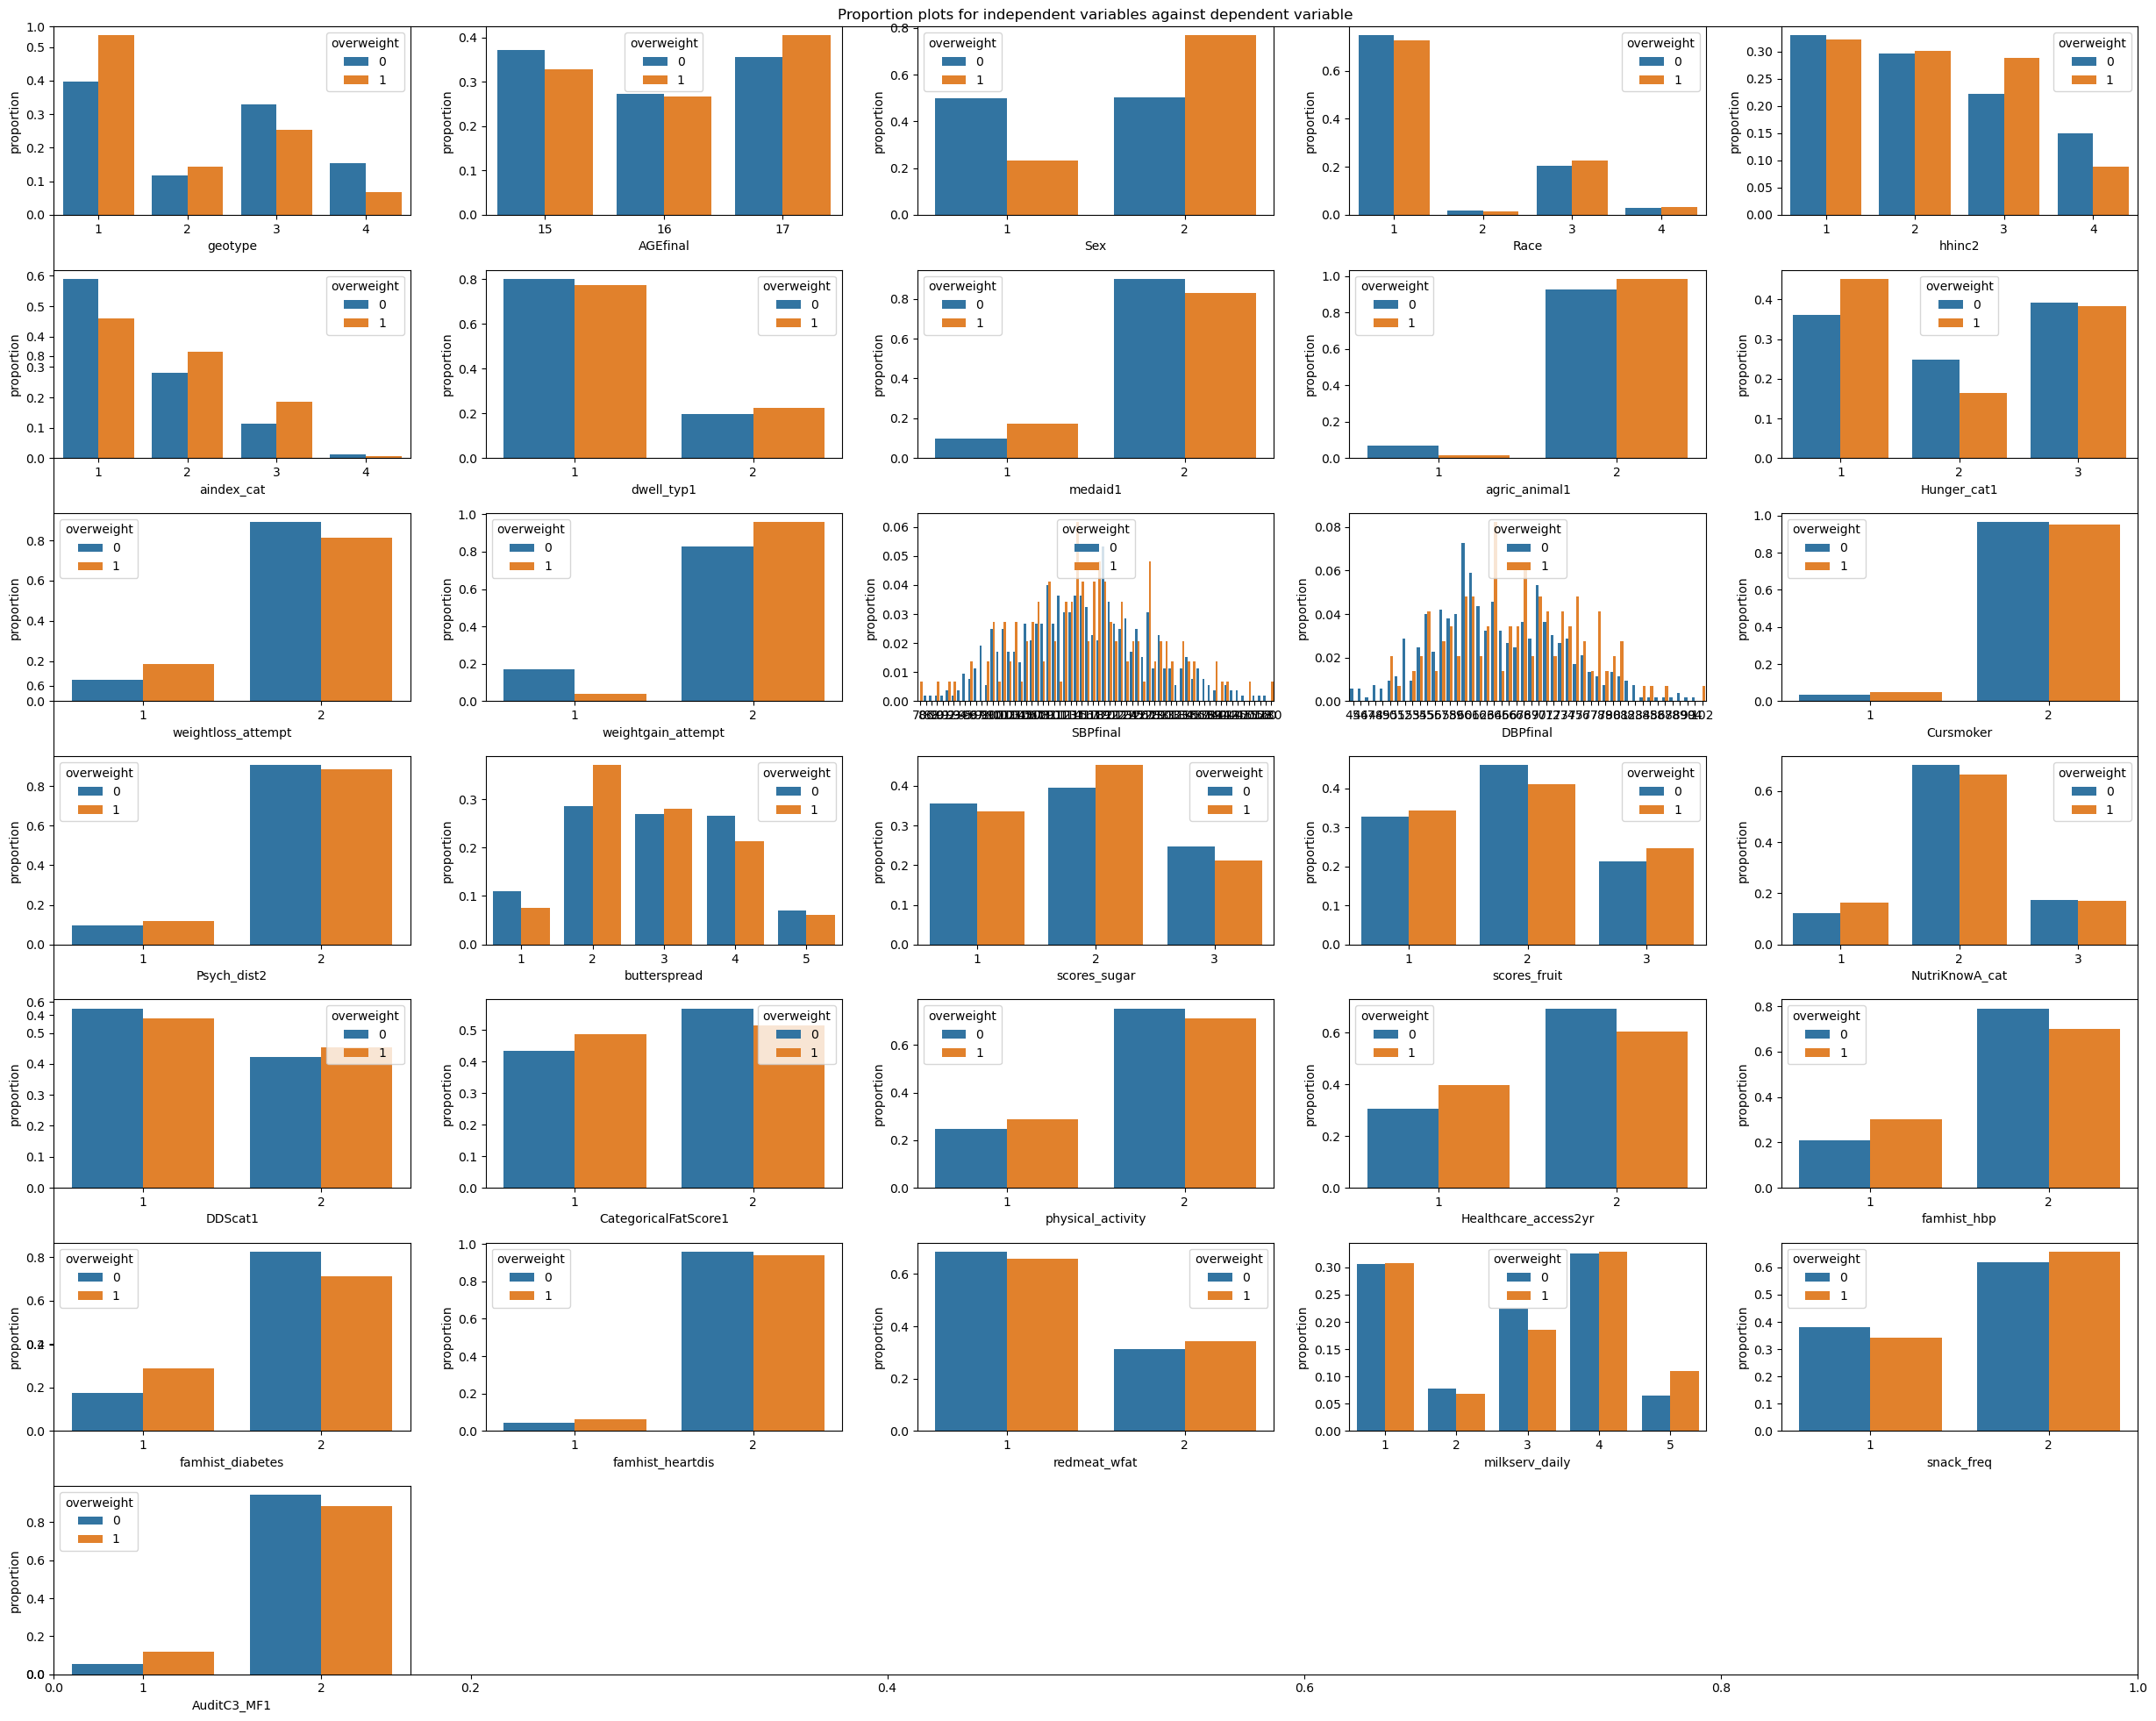

In [11]:
fig = plt.figure(figsize=(25,20))

plt.title("Proportion plots for independent variables against dependent variable")

for i, col in enumerate(df.drop(columns="overweight").columns.to_list()):
    ax1 = fig.add_subplot(7, 5, i+1)
    x, y, hue = col, "proportion", "overweight"
    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax1))

plt.tight_layout()
fig.savefig('bivariate.jpeg')
plt.show()

In [12]:
# correlation plot
plt.figure(figsize = [20, 18])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r')
plt.tight_layout()
plt.savefig('multi.jpeg') # save the plot
plt.show()

In [13]:
X = df.drop(["overweight"], axis = 1)
y = df["overweight"]

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [15]:
y.value_counts()

1    525
0    525
Name: overweight, dtype: int64

(0.0, 60.0)

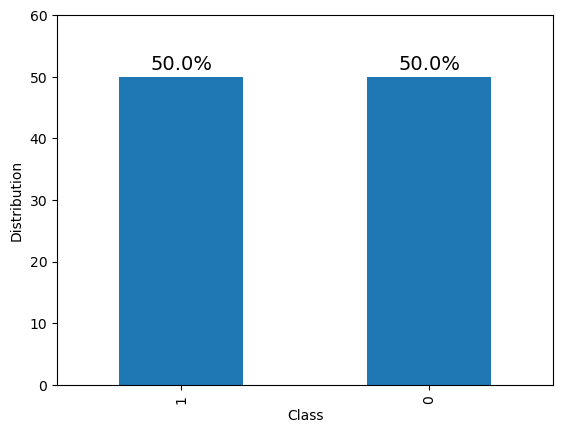

In [16]:
#To check our target variable

ax = y.value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y_h = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y_h)

    # Annotate plot
    ax.annotate(label, xy=(x, y_h), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Distribution")
ax.set_ylim(0,60)    

# Remove y axis
#ax.get_yaxis().set_visible(False)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, stratify = y, test_size = 0.3)

In [18]:
# make a copy of X_train
X_train_scaled = X_train.copy()

# make a copy of X_test
X_test_scaled = X_test.copy()

In [19]:
scaler = StandardScaler()
scaler.fit(X_train_scaled)

X_train_scaled[X_train_scaled.columns] = scaler.transform(X_train)
X_train_scaled.head()

geotype  AGEfinal       Sex      Race    hhinc2  aindex_cat  dwell_typ1  \
353 -0.922374  1.314162 -1.187365 -0.544857  0.995917    0.667904    -0.42623   
247 -0.922374  0.088389 -1.187365 -0.544857 -1.057376    0.667904    -0.42623   
693 -0.922374  0.088389 -1.187365 -0.544857 -0.030730    2.086717    -0.42623   
884 -0.922374  0.088389 -1.187365 -0.544857 -1.057376   -0.750909    -0.42623   
830  0.987329 -1.137384  0.842201 -0.544857 -1.057376   -0.750909    -0.42623   

      medaid1  agric_animal1  Hunger_cat1  weightloss_attempt  \
353  0.463547       0.209843    -1.040998             0.48721   
247  0.463547       0.209843     1.274081             0.48721   
693 -2.157277       0.209843    -1.040998             0.48721   
884  0.463547       0.209843     1.274081             0.48721   
830  0.463547       0.209843     0.116541             0.48721   

     weightgain_attempt  SBPfinal  DBPfinal  Cursmoker  Psych_dist2  \
353            0.382944  0.296054  1.678071   0.220232     0.417279   
247            0.382944  0.456172 -0.672347   0.220232     0.417279   
693            0.382944  0.936525  1.678071  -4.540666     0.417279   
884            0.382944  0.135937  1.325508   0.220232    -2.396481   
830            0.382944 -1.145005 -0.907389   0.220232    -2.396481   

     butterspread  scores_sugar  scores_fruit  NutriKnowA_cat   DDScat1  \
353      0.263020      0.318051      0.328255       -1.697814  1.422916   
247      2.177080     -1.065190     -1.082667        0.108110 -0.702782   
693      0.263020     -1.065190      0.328255       -1.697814 -0.702782   
884     -0.694009     -1.065190      0.328255        0.108110 -0.702782   
830     -0.694009      0.318051      0.328255        0.108110  1.422916   

     CategoricalFatScore1  physical_activity  Healthcare_access2yr  \
353             -0.863622           0.689858              0.868433   
247             -0.863622           0.689858             -1.151499   
693             -0.863622          -1.449574             -1.151499   
884             -0.863622           0.689858              0.868433   
830             -0.863622           0.689858             -1.151499   

     famhist_hbp  famhist_diabetes  famhist_heartdis  redmeat_wfat  \
353     0.713611          0.666339          0.281594     -0.561113   
247    -1.401324         -1.500737          0.281594     -0.561113   
693    -1.401324         -1.500737         -3.551213     -0.561113   
884    -1.401324         -1.500737          0.281594     -0.561113   
830     0.713611          0.666339          0.281594     -0.561113   

     milkserv_daily  snack_freq  AuditC3_MF1  
353        0.213531    0.887875     0.339597  
247       -1.310211    0.887875     0.339597  
693        0.975402    0.887875    -2.944665  
884        0.213531   -1.126285     0.339597  
830        0.975402    0.887875     0.339597

In [20]:
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test)
X_test_scaled.head()

geotype  AGEfinal       Sex      Race    hhinc2  aindex_cat  \
903  -0.922374  0.088389  0.842201 -0.544857 -1.057376    0.667904   
1016 -0.922374  1.314162  0.842201 -0.544857  2.022563   -0.750909   
944  -0.922374 -1.137384 -1.187365  3.020156  0.995917    2.086717   
801  -0.922374 -1.137384  0.842201 -0.544857 -1.057376   -0.750909   
87   -0.922374  1.314162 -1.187365 -0.544857  0.995917   -0.750909   

      dwell_typ1   medaid1  agric_animal1  Hunger_cat1  weightloss_attempt  \
903     -0.42623  0.463547       0.209843    -1.040998            0.487210   
1016    -0.42623  0.463547       0.209843     0.116541            0.487210   
944     -0.42623 -2.157277       0.209843    -1.040998           -2.052502   
801     -0.42623  0.463547       0.209843     0.116541            0.487210   
87      -0.42623  0.463547       0.209843     0.116541            0.487210   

      weightgain_attempt  SBPfinal  DBPfinal  Cursmoker  Psych_dist2  \
903             0.382944 -1.225064 -0.202264   0.220232     0.417279   
1016            0.382944  0.055878 -0.554827   0.220232     0.417279   
944             0.382944  0.296054 -0.084743   0.220232     0.417279   
801             0.382944 -1.305123 -1.024910   0.220232     0.417279   
87              0.382944  2.057349  1.090466   0.220232     0.417279   

      butterspread  scores_sugar  scores_fruit  NutriKnowA_cat   DDScat1  \
903       0.263020      0.318051      1.739178        0.108110  1.422916   
1016     -0.694009      1.701293      1.739178        0.108110 -0.702782   
944      -1.651039     -1.065190      0.328255        1.914034 -0.702782   
801       0.263020      0.318051     -1.082667        0.108110 -0.702782   
87        0.263020      1.701293     -1.082667        0.108110 -0.702782   

      CategoricalFatScore1  physical_activity  Healthcare_access2yr  \
903              -0.863622           0.689858             -1.151499   
1016             -0.863622          -1.449574             -1.151499   
944               1.157914          -1.449574              0.868433   
801              -0.863622          -1.449574              0.868433   
87                1.157914          -1.449574              0.868433   

      famhist_hbp  famhist_diabetes  famhist_heartdis  redmeat_wfat  \
903      0.713611          0.666339          0.281594     -0.561113   
1016    -1.401324         -1.500737          0.281594     -0.561113   
944     -1.401324          0.666339          0.281594      1.782172   
801     -1.401324         -1.500737         -3.551213     -0.561113   
87      -1.401324         -1.500737          0.281594     -0.561113   

      milkserv_daily  snack_freq  AuditC3_MF1  
903        -1.310211    0.887875     0.339597  
1016        0.975402   -1.126285     0.339597  
944         0.975402   -1.126285     0.339597  
801        -1.310211    0.887875     0.339597  
87          0.975402   -1.126285     0.339597

In [21]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import  ConfusionMatrixDisplay

In [22]:
all_scores_dict = {} # scores for all models

In [23]:
def evaluate_model(actual_target, pred, data_type= "TEST"):
    """
    This function returns the evaluation metrics of a model on the test set
    
    params:
        actual_target: actual target for the test set
        pred: predicted target for the test 
    """
    

    class_report = metrics.classification_report(actual_target,pred, target_names=['0', '1'])
    conf_mat = metrics.confusion_matrix(y_true=actual_target, y_pred=pred)
    
    
    #acc_score = metrics.accuracy_score(actual_target,pred)
    prec = metrics.precision_score(actual_target,pred)
    sensitivity = metrics.recall_score(actual_target,pred)
    specificity = metrics.recall_score(actual_target,pred, pos_label=0)
    bal_acc = metrics.balanced_accuracy_score(actual_target, pred)
    f1_score = metrics.f1_score(actual_target,pred)
    mcc = matthews_corrcoef(actual_target,pred)
    kappa = cohen_kappa_score(actual_target,pred)
    #roc = roc_auc_score(actual_target, pred_proba)
    
    print(f"\n=========================={data_type}=====================================")    
    print("confusion matrix: \n", conf_mat)
    #print("\nAccuracy: %.3f"%(acc_score))
    print("Precision: %.3f"%(prec))
    print("Sensitivity/recall: %.3f"%(sensitivity))
    print("Specificity: %.3f"%(specificity))
    print("Balanced Accuracy: %.3f"%(bal_acc))
    print("F1 score: %.3f"%(f1_score))
    print("MCC: %.3f"%(mcc))
    print("kappa: %.3f"%(kappa))
    print("Classification report: \n",class_report)
    
    return [bal_acc, prec, sensitivity, specificity, f1_score, kappa, mcc], conf_mat


def plot_confusion_matrix_heatmap(conf_mat, plot_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title(plot_name)
    plt.savefig(plot_name + ".jpeg")
    plt.show()

In [24]:
#With gini as default criterion
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred = dt.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Gini'], dt_cm = evaluate_model(y_test, dt_test_pred,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[109  49]
 [ 37 120]]
Precision: 0.710
Sensitivity/recall: 0.764
Specificity: 0.690
Balanced Accuracy: 0.727
F1 score: 0.736
MCC: 0.455
kappa: 0.454
Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       158
           1       0.71      0.76      0.74       157

    accuracy                           0.73       315
   macro avg       0.73      0.73      0.73       315
weighted avg       0.73      0.73      0.73       315



In [25]:
plot_confusion_matrix_heatmap(dt_cm, "Upsampling_Gini")

In [26]:
feature_cols = X_train_scaled.columns.tolist()

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('upsam_gini.png')
Image(graph.create_png())

In [28]:
# with gini and max depth 7
dt_tun = DecisionTreeClassifier(max_depth = 7, random_state = 42)
dt_tun.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_tun = dt_tun.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Gini (Max_depth = 7)'], dt_tun_cm = evaluate_model(y_test, dt_test_pred_tun,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[121  37]
 [ 38 119]]
Precision: 0.763
Sensitivity/recall: 0.758
Specificity: 0.766
Balanced Accuracy: 0.762
F1 score: 0.760
MCC: 0.524
kappa: 0.524
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       158
           1       0.76      0.76      0.76       157

    accuracy                           0.76       315
   macro avg       0.76      0.76      0.76       315
weighted avg       0.76      0.76      0.76       315



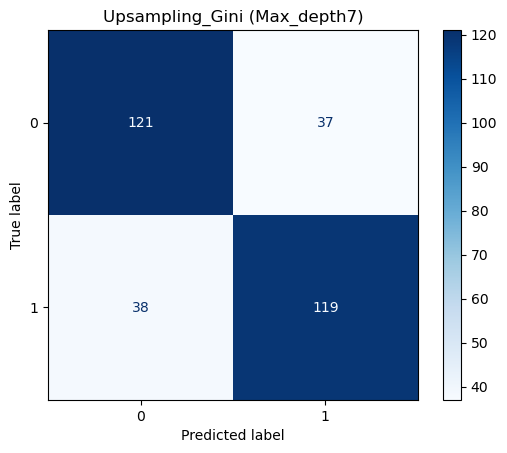

In [29]:
plot_confusion_matrix_heatmap(dt_tun_cm, "Upsampling_Gini (Max_depth7)")

In [30]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_tun, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('upsam_gini7.png')
Image(graph.create_png())

In [31]:
# with entropy
dt_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
dt_ent.fit(X_train_scaled, y_train)

# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_ent = dt_ent.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Entropy'], dt_ent_cm = evaluate_model(y_test, dt_test_pred_ent,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[118  40]
 [ 34 123]]
Precision: 0.755
Sensitivity/recall: 0.783
Specificity: 0.747
Balanced Accuracy: 0.765
F1 score: 0.769
MCC: 0.531
kappa: 0.530
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       158
           1       0.75      0.78      0.77       157

    accuracy                           0.77       315
   macro avg       0.77      0.77      0.77       315
weighted avg       0.77      0.77      0.77       315



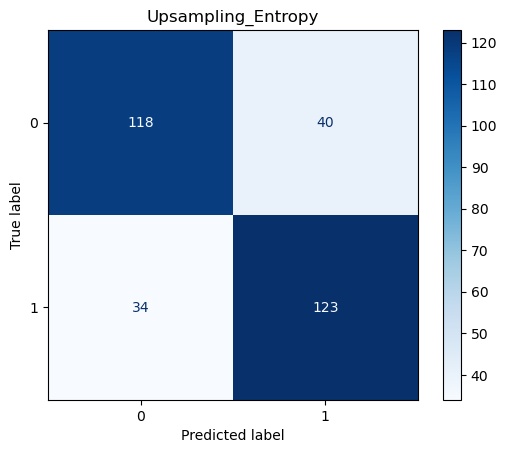

In [32]:
plot_confusion_matrix_heatmap(dt_ent_cm, "Upsampling_Entropy")

In [33]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_ent, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('up_ent.png')
Image(graph.create_png())

In [34]:
# with entropy
dt_ent_tun = DecisionTreeClassifier(max_depth = 7, criterion = "entropy", random_state = 42)
dt_ent_tun.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_ent_tun = dt_ent_tun.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Entropy (Max_depth = 7)'], dt_ent_tun_cm = evaluate_model(y_test, dt_test_pred_ent_tun,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[104  54]
 [ 30 127]]
Precision: 0.702
Sensitivity/recall: 0.809
Specificity: 0.658
Balanced Accuracy: 0.734
F1 score: 0.751
MCC: 0.472
kappa: 0.467
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.66      0.71       158
           1       0.70      0.81      0.75       157

    accuracy                           0.73       315
   macro avg       0.74      0.73      0.73       315
weighted avg       0.74      0.73      0.73       315



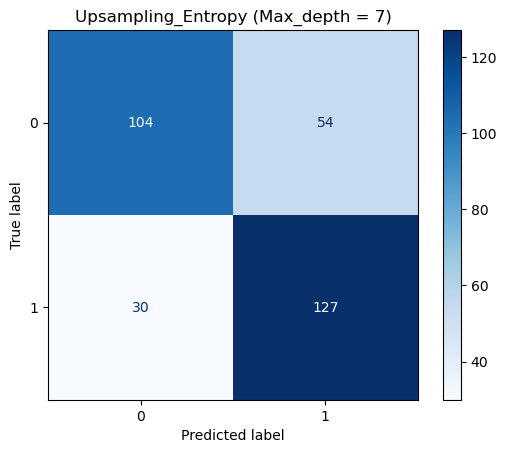

In [35]:
plot_confusion_matrix_heatmap(dt_ent_tun_cm, "Upsampling_Entropy (Max_depth = 7)")

In [36]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_ent_tun, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('upsam_ent7.png')
Image(graph.create_png())

In [37]:
#all_scores_dict

In [38]:
metrics_label = ['Balanced Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1_Score', 'Cohen_Kappa', 'MCC']
#metrics_label = ["Models"]
score_df = pd.DataFrame(all_scores_dict, index = metrics_label).T.round(3)

In [39]:
score_df

Balanced Accuracy  Precision  Sensitivity  \
Gini                                 0.727      0.710        0.764   
Gini (Max_depth = 7)                 0.762      0.763        0.758   
Entropy                              0.765      0.755        0.783   
Entropy (Max_depth = 7)              0.734      0.702        0.809   

                         Specificity  F1_Score  Cohen_Kappa    MCC  
Gini                           0.690     0.736        0.454  0.455  
Gini (Max_depth = 7)           0.766     0.760        0.524  0.524  
Entropy                        0.747     0.769        0.530  0.531  
Entropy (Max_depth = 7)        0.658     0.751        0.467  0.472

In [40]:
#score_df.to_csv("Upsampling_Without_Feature_Selection.csv", index=True)

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(score_df.T['Gini'], label = 'DT_Gini')
plt.plot(score_df.T['Gini (Max_depth = 7)'], label = 'DT_Gini_7')
plt.plot(score_df.T['Entropy'], label = 'DT_Ent')
plt.plot(score_df.T['Entropy (Max_depth = 7)'], label = 'DT_Ent_7')

# Add labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
#plt.title('Voting Evaluation Metrics the First Set')

plt.ylim(0.4, 0.9)

plt.legend(loc = 'upper right')

# Show the plot
plt.savefig("upsampling_without_feature_selection.png")
plt.show()

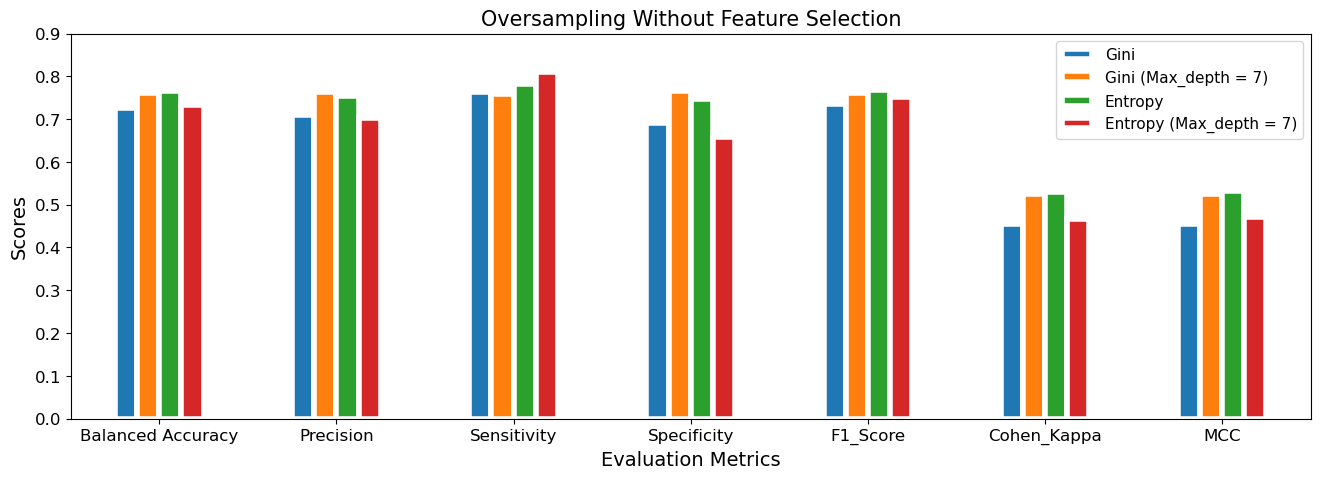

In [45]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(111)
plt.ylim(0, 0.9)
plt.title("Oversampling Without Feature Selection", size = 15)
plt.yticks(fontsize = 12)

score_df.T.plot.bar(ax = ax, linewidth = 4, edgecolor = 'white');
plt.legend(loc = 'upper right', ncol = 1, fontsize = 11);
plt.xticks(fontsize = 12, rotation = 0);
plt.xlabel("Evaluation Metrics", fontsize = 14)
plt.ylabel("Scores", fontsize = 14)
plt.savefig("BarchartOversamplingWithout")